0:00:02.92 - Let's conclude our story by revealing
0:00:04.27 - Let's 
conclude 
our 
story
by 
revealing
the
 true
 identity
of 
Araragi 
Tsukihi.
0:00:06.45 - the true identity of Araragi Tsukihi.
0:00:10.86 - You're always like that, Onii-chan.
0:00:13.62 - You always treat us like children.


No usable fontconfig configuration file found, using fallback.
Fontconfig error: Cannot load default config file

Fontconfig error: Cannot load default config file


sub time: 2.92


2.92

2.941

"Let's conclude our story by revealing"

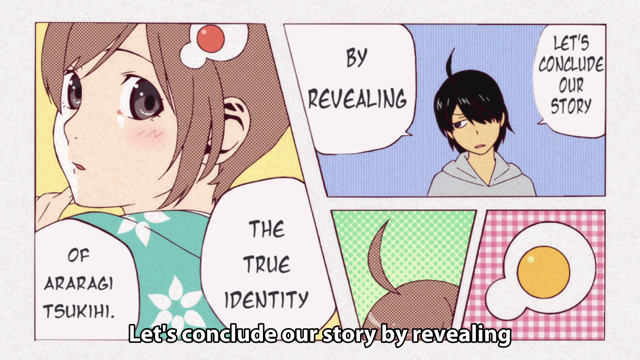

sub time: 4.27


4.27

4.275

"Let's \nconclude \nour \nstory\nby \nrevealing\nthe\n true\n identity\nof \nAraragi \nTsukihi."

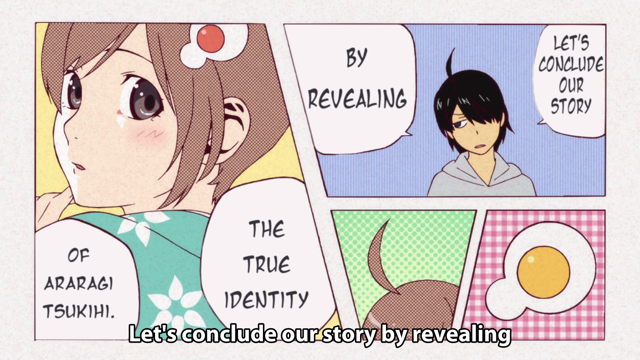

sub time: 6.45


6.45

6.486

'the true identity of Araragi Tsukihi.'

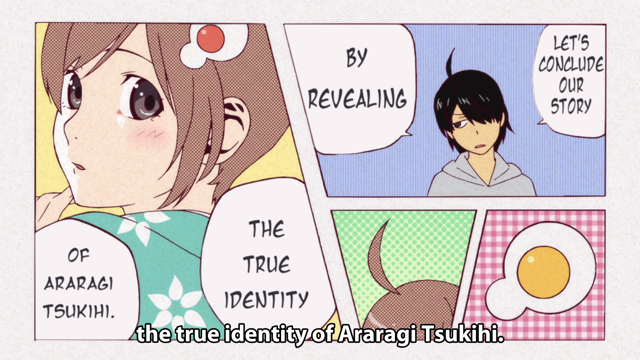

sub time: 10.86


10.86

10.865

"You're always like that, Onii-chan."

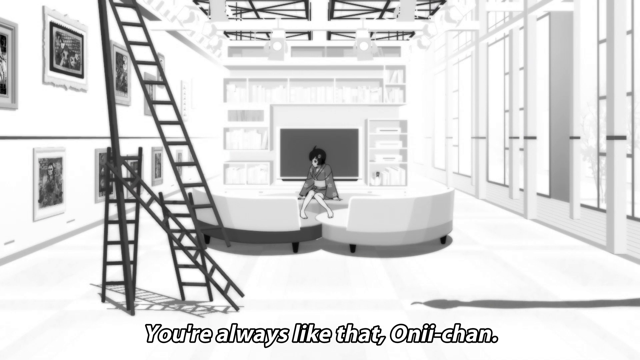

sub time: 13.62


13.62

13.66

'You always treat us like children.'

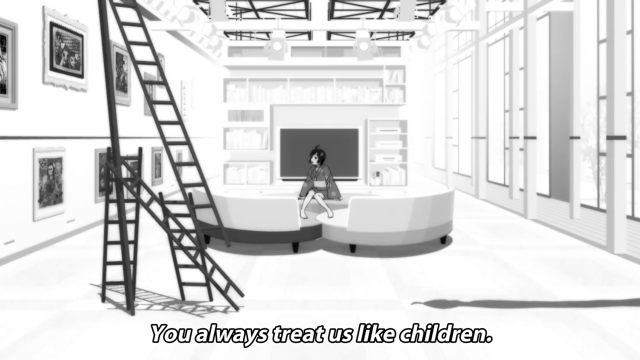

In [1]:
import av
import json
from av.filter import Graph
from IPython.display import Image, display

def ms_to_hhmmssff(time_ms, main_sep=':', frac_sep='.'):
    fraction = int((time_ms % 1000) / 10)
    seconds = int((time_ms / 1000) % 60)
    minutes = int((time_ms / (1000 * 60)) % 60)
    hours = int((time_ms / (1000 * 60 * 60)))

    return f"{hours}{main_sep}{minutes:02}{main_sep}{seconds:02}{frac_sep}{fraction:02}"

video_path = '/mnt/e/gatari_lines/source/02 Nisemonogatari/[Coalgirls] Nisemonogatari 08 (1920X1080 Blu-Ray Flac) [3Acaea65]-8.mkv'
sub_path = '/mnt/e/gatari_lines/mediainfo/[Coalgirls] Nisemonogatari 08 (1920X1080 Blu-Ray Flac) [3Acaea65]-8/subs/2_und.json'

subs = json.load(open(sub_path, 'r'))['subs']
sub_times = sorted((((((sub['start_ms'] + sub['end_ms']) / 2) / 1000), sub) for sub in subs), key=lambda t: t[0])[:5]
for t, s in sub_times:
    print(f"{ms_to_hhmmssff(t * 1000)} - {s['text']}")
container = av.open(str(video_path))
container.streams.video[0].thread_type = "AUTO"

graph = Graph()

in_video = graph.add_buffer(template=container.streams.video[0])
subs = graph.add("subtitles", filename=str(video_path), si="0")
sink = graph.add("buffersink")

in_video.link_to(subs)
subs.link_to(sink)
graph.configure()

decode = container.decode(container.streams.video[0])
for sub_time, sub in sub_times:
    print(f"sub time: {sub_time}")
    for frame in container.decode(container.streams.video[0]):
        graph.push(frame)
        pulled = graph.pull()
        if pulled.time > sub_time:        
            display(sub_time, pulled.time, sub['text'], pulled.to_image().resize((640,360)))
            break

In [1]:
from models import SubtitleLine
from process_subs import extract_ass_subtext
from pathlib import Path
from inspect import getmembers
from pprint import pprint
extracted = extract_ass_subtext(Path('test3.sorted.ass'))[:20]
pprint(getmembers(extracted[0]))
set(extracted)

[('__annotations__',
  {'end': typing.Annotated[str, 'Timestamp of when this subtitle is hidden'],
   'end_ms': typing.Annotated[int, 'Time in milliseconds of when this subtitle is hidden'],
   'raw_subs': typing.Annotated[typing.Tuple[str], 'Raw subtitle text for this line, including control characters'],
   'start': typing.Annotated[str, 'Timestamp of when this subtitle is displayed'],
   'start_ms': typing.Annotated[int, 'Time in milliseconds of when this subtitle is displayed'],
   'text': typing.Annotated[str, 'Text only version of subtitle']}),
 ('__class__', <class 'models.SubtitleLine'>),
 ('__dataclass_fields__',
  {'end': Field(name='end',type=typing.Annotated[str, 'Timestamp of when this subtitle is hidden'],default=<dataclasses._MISSING_TYPE object at 0x7f0d5eb19b40>,default_factory=<dataclasses._MISSING_TYPE object at 0x7f0d5eb19b40>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
   'end_ms': Field(name='end_ms',type

{SubtitleLine(start='0:00:00.02', start_ms=20, end='0:00:00.04', end_ms=40, raw_subs='{\\fnChenier\\1a&H05&\\blur1.1\\fs60\\c&HFFFFFF&\\b1\\pos(1186,290)\\frz350.3}Sector From Here', text='Sector From Here'),
 SubtitleLine(start='0:00:00.02', start_ms=20, end='0:00:00.12', end_ms=120, raw_subs='{\\c&HFFFEFF&\\fax0.01\\fnShakespeare First Folio Font\\blur1\\fs50\\b1\\frz29.7\\pos(640,828)}Tsukimonogatari', text='Tsukimonogatari'),
 SubtitleLine(start='0:00:00.04', start_ms=40, end='0:00:00.08', end_ms=80, raw_subs='{\\fnChenier\\1a&H05&\\blur1.1\\fs60\\c&HFFFFFF&\\b1\\pos(1186,289.99)\\frz350.3}Sector From Here', text='Sector From Here'),
 SubtitleLine(start='0:00:00.08', start_ms=80, end='0:00:00.12', end_ms=120, raw_subs='{\\fnChenier\\1a&H05&\\blur1.1\\fs60\\c&HFFFFFF&\\b1\\pos(1186,289.97)\\frz350.3}Sector From Here', text='Sector From Here'),
 SubtitleLine(start='0:00:00.12', start_ms=120, end='0:00:00.16', end_ms=160, raw_subs='{\\c&HFDFDFC&\\fax0.01\\fnShakespeare First Folio Fon